In [1]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]

from scipy.sparse import load_npz, save_npz, vstack

In [2]:
features = load_npz('features_silico_dropped.npz')
features.shape

(75711, 4184)

In [3]:
classes = np.load('classes_silico.npy')
classes.shape

(75711, 71)

In [4]:
def plotDistribution(y):
    n_ones =  y.sum(axis=0)
    n_records =  y.shape[0]
    n_labels =  y.shape[1]
    plt.bar(np.arange(n_labels),n_ones)
    plt.ylim([0,n_records])
    plt.title('Number of \'1\'s in Each Label')
    plt.show()

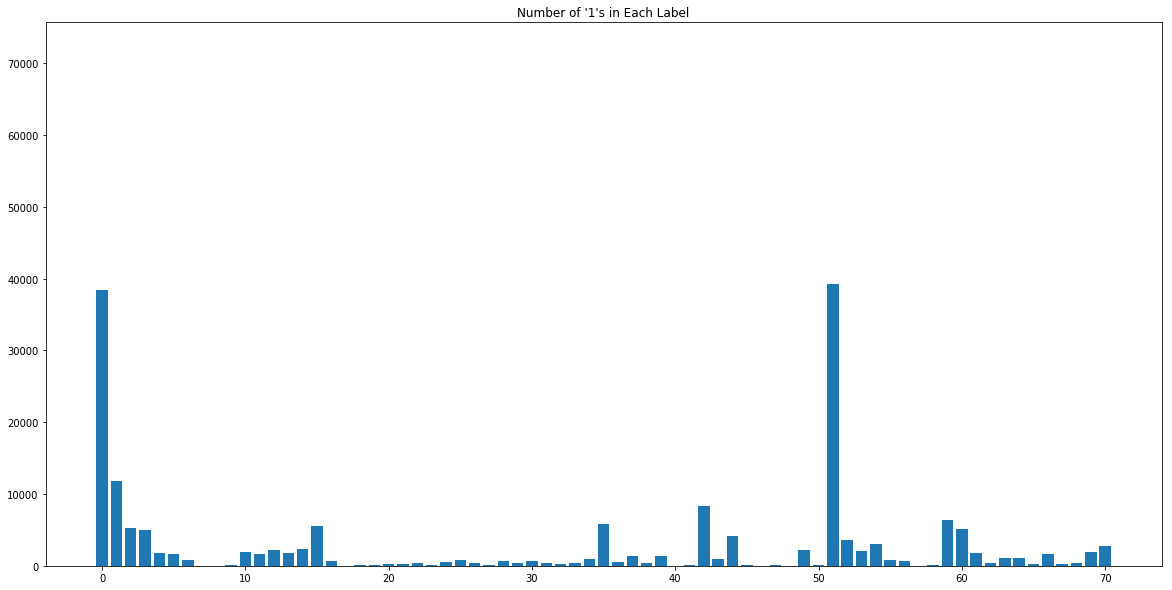

In [5]:
plotDistribution(classes)

In [6]:
def duplicateMinority(x, y):

    n = y.shape[0]
    n_pos = y.sum(axis=0)
    n_neg = n - n_pos

    minValue_pos = n_pos[n_pos != 0].min()
    minValue_neg = n_neg[n_neg != 0].min()

    new_x = x.copy()
    new_y = y.copy()
    
    if minValue_pos < minValue_neg:
        minValue = minValue_pos
        minIndex = np.where(n_pos == minValue)
        ind = np.full((n), False, dtype=bool)
        for i in minIndex[0]:
            ind = ind | (y[:,i] == 1)
        new_x = vstack([new_x, x[ind]])
        new_y = np.append(new_y, y[ind], axis=0)
    else:
        minValue = minValue_neg
        minIndex = np.where(n_neg == minValue)
        ind = np.full((n), False, dtype=bool)
        for i in minIndex[0]:
            ind = ind | (y[:,i] == 0)
        new_x = vstack([new_x, x[ind]])
        new_y = np.append(new_y, y[ind], axis=0)
            
    return new_x, new_y, ind.sum()

In [7]:
def duplicateMinorities(x, y, threshold=0.1, max_perc=0.5):
    
    new_x = x.copy()
    new_y = y.copy()
    i = 0
    
    while True:
        
        n = new_y.shape[0]
        n_pos = new_y.sum(axis=0)
        n_neg = n - n_pos

        minValue_pos = n_pos[n_pos != 0].min()
        minValue_neg = n_neg[n_neg != 0].min()

        ratio_pos = minValue_pos / n
        ratio_neg = minValue_neg / n
        
        if (ratio_pos > threshold and ratio_neg > threshold) or i/n >= max_perc:
            break;
        else:
            new_x, new_y, i_inc = duplicateMinority(new_x, new_y)
            i = i + i_inc
            print('{},{},{}'.format(ratio_pos, ratio_neg, i/n))
        
    return new_x, new_y

In [8]:
new_features, new_classes = duplicateMinorities(features, classes, max_perc=0.8)

2.6416240704785303e-05,0.48208318474197936,2.6416240704785303e-05
5.283108581089113e-05,0.4820968657958343,0.00013207771452722783
6.603188019175658e-05,0.48213837640812984,0.00019809564057526974
0.00010564403243271796,0.48217256952697884,0.0004093706256767821
0.00013202714478096697,0.482255551741438,0.0005413112936019645
0.00015841165909810963,0.4823238990389693,0.0006996514943499842
0.00021118209175861888,0.48231349981521565,0.0011219048624676628
0.00025067285872605415,0.48247928650588423,0.0013721040688162963
0.0002638000395700059,0.48258260238739037,0.0016355602453340368
0.0003164765609547043,0.48271906111953583,0.0019516054592206764
0.00042183524697135473,0.48269816369844054,0.0027946585111852254
0.0005005070927123533,0.48302885818526664,0.0032928098204760086
0.0005265860112426113,0.48323481786706335,0.0038177485815089323
0.0005526243075749004,0.483506795963211,0.004368363574163498
0.0006312218087134911,0.4837920650158463,0.004997172652315138
0.0008410981587835618,0.483749720729127

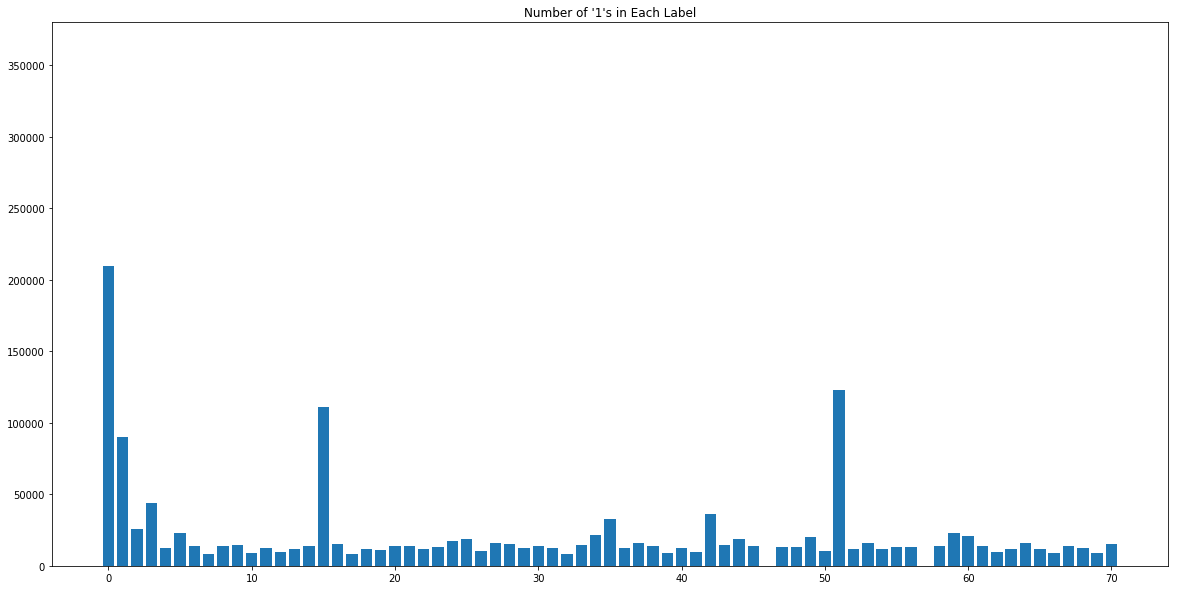

In [9]:
plotDistribution(new_classes)

In [10]:
save_npz('features_silico_duplicated', new_features)

In [11]:
np.save('classes_silico_duplicated', new_classes)